# Lecture 6: Taylor series and optimization via Newton's method

Before we get started, let's load some packages

In [1]:
# First, we load needed packages

%matplotlib inline                             
# Allows viewing figures inline in the notebook
import numpy as np                             # Numpy is a library for numerical computation
import matplotlib.pyplot as plt                # Matplotlib is a plotting library
from matplotlib import cm                      # Import colormaps
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,8) # Makes the figures larger
from mpl_toolkits.mplot3d import Axes3D        # For 3D plotting

### Part 1: Taylor series for functions of a single variable

Using Taylor series, we can (locally) approximate functions as polynomials. We start out by looking at a couple of iterations of the Taylor series expansion of the exponential function $f(x) = e^x$ in $x_0 = 0$.

For this, we will be needing derivatives of $f$ at $0$. Note that $f'(x) = e^x = f(x)$, so $f'(x) =  f''(x) = \ldots = f^{(n)}(x)$. In particular, $f'(0) = f''(0) = \ldots = f^{(n)}(0) = 1$.

Text(0.5,1,'Taylor series approximations of $f$ with increasing order')

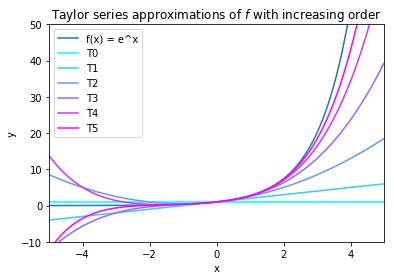

In [2]:
# First, we compute the approximations for evenly sampled values in the interval [-5, 5]
x = np.linspace(-5,5,100)  # we draw 100 samples from the interval [-5, 5]
fx = np.exp(x)             # The value of the exponential function at the sampled x values
T0 = np.ones(x.shape)      # The value of the 0th (constant) Taylor series expansion of f
T1 = T0 + x                # The value of the 1st Taylor series expansion of f
T2 = T1 + np.power(x, 2)/2
T3 = T2 + np.power(x, 3)/(np.math.factorial(3))
T4 = T3 + np.power(x, 4)/(np.math.factorial(4))
T5 = T4 + np.power(x, 5)/(np.math.factorial(5))

# Next, we plot the different approximations along with the ground truth function
colors = cm.cool(np.linspace(0,1,6))
plt.plot(x, fx, label='f(x) = e^x')
plt.plot(x, T0, label='T0', color=colors[0])
plt.plot(x, T1, label='T1', color=colors[1])
plt.plot(x, T2, label='T2', color=colors[2])
plt.plot(x, T3, label='T3', color=colors[3])
plt.plot(x, T4, label='T4', color=colors[4])
plt.plot(x, T5, label='T5', color=colors[5])
plt.legend()
plt.axis([-5, 5, -10, 50])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Taylor series approximations of $f$ with increasing order')

Let's repeat the procedure with another familiar function: $f(x) = sin(x)$, again expanded at $x=0$. 

We will need again the derivatives $f'(0), f''(0), f'''(0), \ldots$

Note that $f'(x) = cos(x)$, $f''(x) = -sin(x)$, $f'''(x) = -cos(x)$, $f''''(x) = sin(x)$ etc, so we get

$f'(0) = 1$,

$f''(0) = 0$,

$f'''(0) = -1$,

$f''''(0) = 0$,

$f^{(5)} = 1$, 

etc. This results in the following approximations:

Text(0.5,1,'Taylor series approximations of $f$ with increasing order')

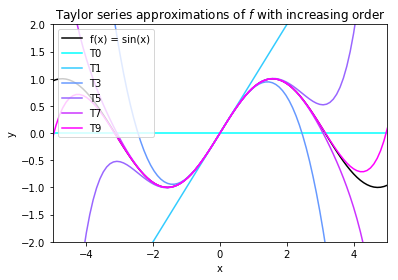

In [3]:
# First, we compute the approximations for evenly sampled values in the interval [-5, 5]
x = np.linspace(-5,5,100)  # we draw 100 samples from the interval [-5, 5]
fx = np.sin(x)             # The value of the sinus function at the sampled x values
T0 = np.zeros(x.shape)     # The value of the 0th (constant) Taylor series expansion of f
T1 = T0 + x                # The value of the 1st Taylor series expansion of f
T3 = T1 - np.power(x, 3)/(np.math.factorial(3))
T5 = T3 + np.power(x, 5)/(np.math.factorial(5))
T7 = T5 - np.power(x, 7)/(np.math.factorial(7))
T9 = T7 + np.power(x, 9)/(np.math.factorial(9))

# Next, we plot the different approximations along with the ground truth function
colors = cm.cool(np.linspace(0,1,6))
plt.plot(x, fx, label='f(x) = sin(x)', color='black')
plt.plot(x, T0, label='T0', color=colors[0])
plt.plot(x, T1, label='T1', color=colors[1])
plt.plot(x, T3, label='T3', color=colors[2])
plt.plot(x, T5, label='T5', color=colors[3])
plt.plot(x, T7, label='T7', color=colors[4])
plt.plot(x, T9, label='T9', color=colors[5])
plt.legend()
plt.axis([-5, 5, -2, 2])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Taylor series approximations of $f$ with increasing order')

### Part 2: Taylor series for functions of more than one variable

Let us start out working with the function $f(x,y) = e^x(1 + y^2)$. Let's plot its graph:

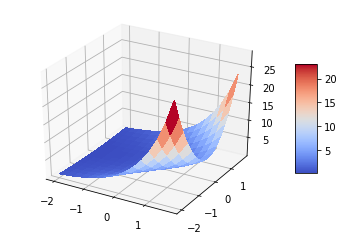

In [4]:
def f(x,y):
    return np.exp(x)*(1 + y**2)

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(X, Y)
R = f(X,Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, R, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

We shall visually compare $f$ to its Taylor approximations at $(0,0)$ of order $0$, $1$ and $2$. For this, we will need the partials of first and second order of $f$:

$\frac{\partial f}{\partial x} = (1 + y^2)e^x$

$\frac{\partial f}{\partial y} = 2e^x y$

$\frac{\partial^2 f}{\partial x^2} = (1+y^2)e^x$

$\frac{\partial^2 f}{\partial y^2} = 2e^x$

$\frac{\partial^2 f}{\partial x \partial y} = 2ye^x$

Thus, we next implement the gradient and Hessian of $f$, and use them to define the Taylor approximations of $f$ of order $0$, $1$ and $2$.

In [5]:
def fgrad(x,y):
    dx = np.multiply((y**2 + 1), np.exp(x))
    dy = 2*np.multiply(np.exp(x), y)
    return np.array([dx, dy])

def fHessian(x,y):
    ddxx = np.multiply((y**2 + 1), np.exp(x))
    ddyy = 2*np.exp(x)
    ddxy = 2*np.multiply(y, np.exp(x))
    return np.array([[ddxx, ddxy], [ddxy, ddyy]])

X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(X, Y)
n, m = X.shape

XYs = np.array([X,Y])        # The (x,y) coordinates of grid points in a 16 x 16 x 2 array
T0 = f(0,0)*np.ones([n,m])
T1 = T0 + np.dot(XYs.T, fgrad(0,0))
T2 = np.zeros(T1.shape)
for i in range(n):
    for j in range(m):
        T2[i,j] = T1[i,j] + 1/2*np.matmul(np.matmul(XYs[:,i,j],fHessian(0,0)), XYs[:,i,j])

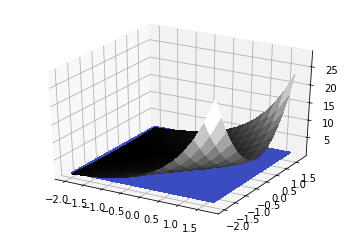

In [6]:
# Plot the surfaces T0, T1 and T2
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, R, cmap=cm.gray,linewidth=0, antialiased=False)
surf0 = ax.plot_surface(X, Y, T0, cmap=cm.coolwarm,linewidth=0, antialiased=False)
#surf1 = ax.plot_surface(X, Y, T1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
#surf2 = ax.plot_surface(X, Y, T2, cmap=cm.coolwarm,linewidth=0, antialiased=False)

### Part 3: Newton's method for optimizing functions of one variable
We start out minimizing a relatively simple function: $f(x) = x^4$.

Its first and second order derivatives are

$f'(x) = 4x^3$, and 

$f''(x) = 12x^2$.

Using those, we implement the function and its derivatives.

In [7]:
def f(x):
    return x**4

def fder(x):
    return 4*x**3

def f2ndder(x):
    return 12*x**2

Next, we implement Newton's method

In [8]:
def fNewton(x0):
    # Let x0 be the initialization    
    cur_x = x0

    # Convergence settings
    convergence = False
    max_iter = 10000
    conv_thr = 0.0001
    
    # Iteration counter
    num_iter = 0    
    
    # Trajectory (not usually necessary)
    points_visited = []
    
    # Iterative loop
    while not(convergence):
        points_visited.append(cur_x)
        # compute the value of f' at the current x
        cur_der = fder(cur_x)
        
        # compute f'', at the current x
        cur_2ndder = f2ndder(cur_x)
        
        old_x = cur_x
        cur_x = old_x - cur_der/cur_2ndder
        
        # check for convergence/stopping
        if num_iter == max_iter:
            convergence = True
            print('reached max_iter')
        elif np.linalg.norm(old_x - cur_x) < conv_thr:
            convergence = True
            print('converged')
            
        # update counter
        num_iter+=1
            
    return cur_x, np.array(points_visited)

Finally, we plot the function and the steps taken along the descent

converged


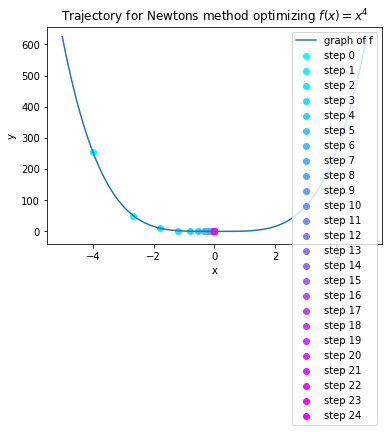

In [9]:
solution, points_visited = fNewton(-4)

# Plotting the trajectory
xs = np.linspace(-5,5,100)
ys = f(xs)
plt.plot(xs, ys, label='graph of f')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory for Newtons method optimizing $f(x) = x^4$')

num_steps = len(points_visited)
colors = colors = cm.cool(np.linspace(0,1,num_steps))
for i in range(num_steps):
    plt.scatter(points_visited[i], f(points_visited[i]), color=colors[i], label='step '+ str(i))
    
plt.legend()

**A second example:** We will minimize the function $f(x) = x \sin(x)$.

Note that the first and second derivatives of $f$ are given by

$f'(x) = x \cos(x) + \sin(x)$, and

$f''(x) = -x \sin(x) + 2\cos(x)$.

Let's implement f along with its derivatives, along with Newton's method for $f$.

In [10]:
def f(x):
    return x*np.sin(x)

def fder(x):
    return x*np.cos(x) + np.sin(x)

def f2ndder(x):
    return -x*np.sin(x) + 2*np.cos(x) 

converged


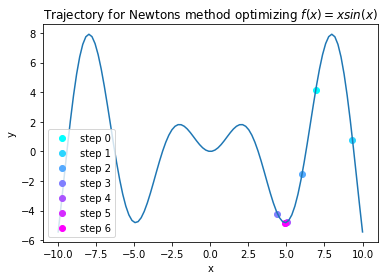

In [11]:
# First, set initialization
x0 = 3*np.random.normal()
#x0 = 1.5

# Next, run Newton's method
solution, points_visited = fNewton(x0)

# Plotting the trajectory
xs = np.linspace(-10,10,100)
ys = f(xs)
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory for Newtons method optimizing $f(x) = x sin(x)$')

num_steps = len(points_visited)
colors = colors = cm.cool(np.linspace(0,1,num_steps))
for i in range(num_steps):
    plt.scatter(points_visited[i], f(points_visited[i]), color=colors[i], label='step '+ str(i))
    
plt.legend()

### Part 4: Newton's method in more than one dimension
Here, we revisit an example from Lecture 5, and compare gradient descent and Newton's method for minimizing the function

$h(x,y) = x^4 + y^4 - 4xy + 1$.

We reuse the computed gradient and Hessian from Lecture 5.

Text(0.5,1,'Contour plot of the function h')

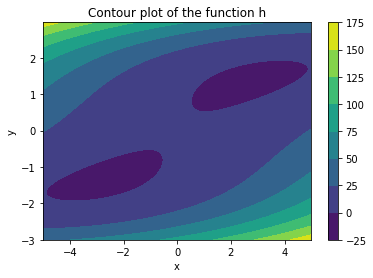

In [12]:
# Defining the function h(x,y) on the 2D plane
def h(x,y):
    return x**2  + y**4 - 4*x*y + 1

# Next, use meshgrid to make a contour plot of the function in the domain [-2, 4] x [-4, 4]
delta = 0.025                                   # width of bin in grid
x = np.arange(-5.0, 5.0, delta)                 # x-coordinates of grid nodes
y = np.arange(-3.0, 3.0, delta)                 # y-coordinates of grid nodes
X, Y = np.meshgrid(x, y)                        # turning the coordinates into a "meshgrid" object
Z = h(X, Y)                                  # evaluating the function on the grid

# Plot the level set of the function (a topographic map) using a contour plot
plt.figure()                                    # creating a figure
plt.contourf(X, Y, Z)                           # making a contour plot
plt.colorbar()                                  # adding a color bar
plt.xlabel('x')                                 # adding x- and y- axis labels
plt.ylabel('y')
plt.title('Contour plot of the function h')  # adding a figure title

First, we implement the gradient and Hessian as in Lecture 5:

In [13]:
def hgrad(x,y):
    dx = 4*x**3 - 4*y
    dy = 4*y**3 - 4*x
    return np.array([dx, dy])

def hHessian(x,y):
    ddxx = 12*x**2
    ddxy = -4
    ddyy = 12*y**2
    
    H = np.array([[ddxx, ddxy], [ddxy, ddyy]])
    
    return H

Next, we implement the Newton's method in 2D:

In [14]:
def hNewton2D(x0):
    # Let x0 be a 2D vector initialization 
    cur_x = x0
    
    # Convergence settings
    convergence = False
    max_iter = 100
    conv_thr = 0.0001
    
    # Iteration counter
    num_iter = 0    
    
    # Trajectory (not usually necessary)
    points_visited = []
    
    # Iterative loop
    while not(convergence):
        points_visited.append(cur_x)
        # compute the value of f' at the current x
        cur_grad = hgrad(cur_x[0], cur_x[1])
        
        # compute f'', at the current x
        cur_Hessian = hHessian(cur_x[0], cur_x[1])
        inv_Hessian = np.linalg.inv(cur_Hessian)
        
        old_x = cur_x
        cur_x = old_x - np.matmul(np.linalg.inv(cur_Hessian), cur_grad)
        
        # check for convergence/stopping
        if num_iter == max_iter:
            convergence = True
            print('reached max_iter')
        elif np.linalg.norm(old_x - cur_x) < conv_thr:
            convergence = True
            print('converged')
            
        # update counter
        num_iter+=1
            
    return cur_x, np.array(points_visited)

For comparison, we also include gradient descent (essentially identical to the gradient ascent from last time):

In [17]:
def hGraddesc(init_loc):
    # Gradient ascent starting at the point specified by init_loc (a 2D vector)
    cur_est = np.array(init_loc) 
    
    # Set variables for determining convergence.
    convergence = False      # variable keeping track of convergence
    num_iter = 0             # number of iterations so far
    max_iter = 10000         # maximum number of iterations
    conv_thr = 0.01        # threshold for convergence 
    
    # Set learning rate (step length parameter). You will want to play with this.
    learningrate = 0.0001
    
    # For the sake of plotting: points visited along trajectory
    points_visited = []
    
    # Iterative loop
    while not(convergence):
        # keep track of points visited
        points_visited.append(cur_est)
        
        # compute the gradient at the current location        
        grad = hgrad(cur_est[0], cur_est[1])
        
        # define step (and its length)       
        step = learningrate*grad
        
        # take a step in the stepping direction
        cur_est = cur_est - step        

        # check for convergence/stopping
        if num_iter == max_iter:
            print('reached max_iter')
            convergence = True
        elif np.linalg.norm(grad) < conv_thr:
            convergence = True
            print('converged')
            
        # update counter
        num_iter+=1
            
    return cur_est, np.array(points_visited)

Now, we run the two methods with identical initialization, and visually compare the resulting trajectories:

converged
converged
Number of iterations for Newtons method: 10
Number of iterations for gradient descent: 7891


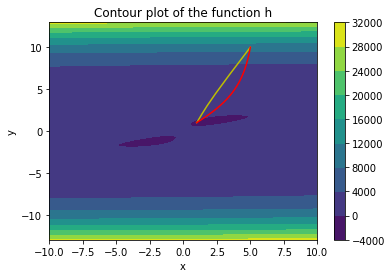

In [18]:
# Running the optimization
init = np.array([5,10])
minimumN, points_visitedN = hNewton2D(init)
minimumGD, points_visitedGD = hGraddesc(init)

# Use meshgrid to make a contour plot of the function
delta = 0.025                                     # width of bin in grid
x = np.arange(-10.0, 10.0, delta)                 # x-coordinates of grid nodes
y = np.arange(-13.0, 13.0, delta)                 # y-coordinates of grid nodes
X, Y = np.meshgrid(x, y)                          # turning the coordinates into a "meshgrid" object
Z = h(X, Y)                                       # evaluating the function on the grid

# Plot the level set of the function (a topographic map) using a contour plot
plt.figure()                                      # creating a figure
plt.contourf(X, Y, Z)                             # making a contour plot
plt.colorbar()                                    # adding a color bar
plt.xlabel('x')                                   # adding x- and y- axis labels
plt.ylabel('y')
plt.title('Contour plot of the function h')       # adding a figure title

# Add trajectory
plt.plot(points_visitedN[:,0], points_visitedN[:,1], 'y', label='Newtons method')
plt.plot(points_visitedGD[:,0], points_visitedGD[:,1], 'r', label='Gradient descent')
plt.legend

# Check number of iterations needed:
print('Number of iterations for Newtons method:', len(points_visitedN))
print('Number of iterations for gradient descent:', len(points_visitedGD))